In [1]:
import numpy as np
from matplotlib import pyplot as plt
import h5py

In [2]:
def read_raw(file):
    f = open(file,'r')
    lines = f.readlines()
    f.close()

    out = {}
    keys = ['wv','dwv','albedo','flux_ratio']
    nw = len(lines)-1
    for key in keys:
        out[key] = np.empty(nw)

    for i,line in enumerate(lines[1:]):
        tmp = line.strip().split('|')[1:-1]
        tmp = [a.strip() for a in tmp]

        for j,key in enumerate(keys):
            out[key][i] = float(tmp[j])
    return out

In [19]:
base_folder = "NA_rfast/plots/"
times = ['Hadean','Archean_low','Archean','Proterozoic',"Proterozoic_high",'Modern']
sp = {}
sp['Hadean'] = ['CO2','H2O','H2','CO']
sp['Archean_low'] = ['CO2','H2O','CH4']
sp['Archean'] = ['CO2','H2O','CH4']
sp['Proterozoic'] = ['CO2','H2O','O2','O3','CH4']
sp['Proterozoic_high'] = ['H2O','O2','O3']
sp['Modern'] = ['CO2','H2O','O2','CH4','O3']
time_names = ['Hadean','Archean 100 ppm CH$_4$','Archean 500 ppm CH$_4$','Proterozoic 0.1% O$_2$',"Proterozoic 1% O$_2$",'Modern']
time_names = time_names[::-1]

plot_species = ['CH4','CO2','H2O','O2','O3','H2','CO']
labels_1 = ['CH$_4$','CO$_2$','H$_2$O','O$_2$','O$_3$','H$_2$','CO']
colors_1 = ['C1','C2','C0','C3','C4','C5','C6']
labels = {}
for i,p in enumerate(plot_species):
    labels[p] = labels_1[i]

colors = {}
for i,p in enumerate(plot_species):
    colors[p] = colors_1[i]

data = {}
for t in times:
    data[t] = {}
    
    folder = base_folder+t+'/'
    
    data[t]['all'] = read_raw(folder+t+".raw")
    
    for s in sp[t]:
        data[t][s] = read_raw(folder+t+"_no"+s+".raw")
    


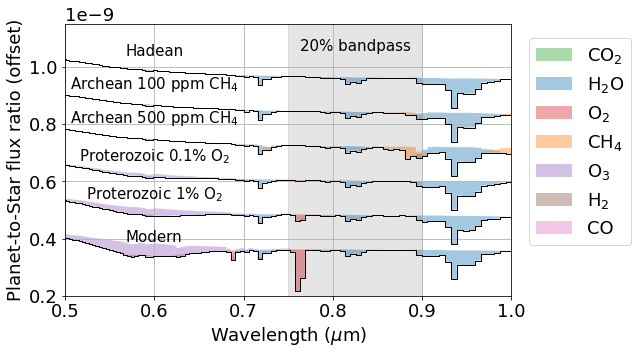

In [37]:
plt.rcParams.update({'font.size': 18})
fig,ax = plt.subplots(1,1,figsize=[8,5])
fig.patch.set_facecolor("w")


sp_visit = []
for i,t in enumerate(times[::-1]):
    offset = 1.2e-10
    
    ind = np.argmin(np.abs(data[t]['all']['wv']-0.6))
    val = data[t]['all']['flux_ratio'][ind]
    
    ax.plot(data[t]['all']['wv'],data[t]['all']['flux_ratio']+offset*i, drawstyle='steps-mid',c='k',lw=1)
    ax.text(.6, val+offset*i+.4e-10, time_names[i], \
        size = 15, ha='center', va='bottom',color='k')
    
    for s in data[t]:
        if s != 'all':
            if s not in sp_visit:
                ax.fill_between(data[t][s]['wv'],data[t]['all']['flux_ratio']+offset*i,data[t][s]['flux_ratio']+offset*i, \
                                lw=0,step='mid',color=colors[s],alpha=.4, label=labels[s])
            else:
                ax.fill_between(data[t][s]['wv'],data[t]['all']['flux_ratio']+offset*i,data[t][s]['flux_ratio']+offset*i, \
                                lw=0,step='mid',color=colors[s],alpha=.4)
            sp_visit.append(s)

ax.set_xlim(0.5,1.0)
ax.set_ylim(0.2e-9,1.15e-9)

ax.set_ylabel('Planet-to-Star flux ratio (offset)')
ax.set_xlabel('Wavelength ($\mu$m)')
ax.legend(ncol=1,bbox_to_anchor=(1.02,0.98),loc='upper left')
ax.grid()

lam_min = 0.75
B = 0.20
lam_max = lam_min*B+lam_min
ax.fill_between([lam_min,lam_max],[0,0],[1,1],color='k',alpha=.1)

ax.text(np.mean([lam_min,lam_max]), 1.1e-9, '20% bandpass', \
        size = 15, ha='center', va='top',color='k')

# plt.savefig('figures_tmp/perfect_bandpass.png',dpi=300,bbox_inches='tight')
plt.show()

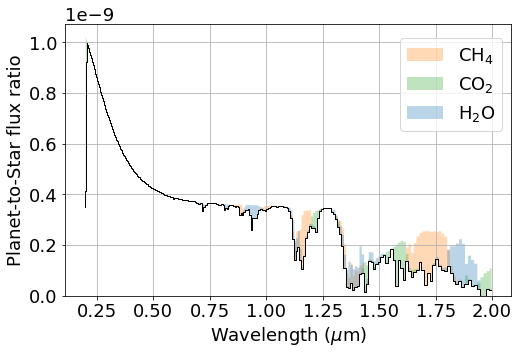

In [9]:
plt.rcParams.update({'font.size': 18})
fig,ax = plt.subplots(1,1,figsize=[8,5])
fig.patch.set_facecolor("w")

ax.plot(data['all']['wv'],data['all']['flux_ratio'], drawstyle='steps-mid',c='k',lw=1,zorder=500)

for i,sp in enumerate(plot_species):
    ax.fill_between(data[sp]['wv'],data['all']['flux_ratio'],data[sp]['flux_ratio'],lw=0,step='mid',color=colors[i],alpha=.3, label=labels[i])


ax.set_xlim(ax.get_xlim()[0],ax.get_xlim()[1])
ax.set_ylim(0,ax.get_ylim()[1])

# ax.set_xlim(0.75,1.2)
# ax.set_ylim(0,5e-10)



ax.set_ylabel('Planet-to-Star flux ratio')
ax.set_xlabel('Wavelength ($\mu$m)')
ax.legend(ncol=1,bbox_to_anchor=(1,0.98),loc='upper right')
ax.grid()

# B = 0.20
# lam_max = 1
# lam_min = bandpass_extents_end(B, lam_max)
# ax.fill_between([lam_min,lam_max],[0,0],[1,1],color='k',alpha=.1)
# ax.fill_between([0.5,0.6],[0,0],[1,1],color='k',alpha=.1)
# ax.text(np.mean([lam_min,lam_max]), 1e-9, '20%\nBP', \
#         size = 12, ha='center', va='top',color='k')
# ax.text(.55, 1e-9, '20%\nBP', \
#         size = 12, ha='center', va='top',color='k')

# ax.set_xticks([.7,.8,.86,.93,1,1.1])
# lam_1 = 1

# ax.axvline(lam_0,c='k')
# ax.axvline(lam_1,c='k')

# plt.savefig('figures_tmp/absorbers.png',dpi=300,bbox_inches='tight')

plt.show()